# Bayesian Statistics Tutorial

### Written by Sarah Blunt, 2018

#### In this tutorial, you will:
- understand Bayesian priors qualitatively
- perform a radvel orbit fit
- add errors in quadrature to estimate total error
- improve your radvel orbit fit using Bayesian priors

#### Before starting this tutorial, please watch the following videos:
- https://www.youtube.com/watch?v=BrK7X_XlGB8
    - Note: I really like this speaker's way of explaining Bayesian concepts, but almost every example expresses stereotypical thinking about a group of people. Such stereotypes can be harmful in a number of ways, including discouraging people from pursuing science. [This link](https://www.dropbox.com/personal/Readings%20about%20Identity%20%26%20the%20Scientific%20Community/06%20The%20Scientist%20Identity%20Today?preview=Frink_Computer+Geeks.pdf) is one of many excellent articles providing examples of the effects of such stereotypes. I encourage you to keep these stereotypes in mind, but for now, focus on the content related to Bayesian statistics and priors. 
- https://www.youtube.com/watch?v=0F0QoMCSKJ4

#### In addition, please read the following guide:
- http://ipl.physics.harvard.edu/wp-uploads/2013/03/PS3_Error_Propagation_sp13.pdf


### In this tutorial, items for you to complete are marked: ``#TODO`` 

In [18]:
# TODO: How do you think we can apply the concepts of Bayesian thinking in astronomy? How about in orbit-fitting
# in particular?

"""
There are many answers to this question. Some examples:

- We can incorporate physics into our statistical analyses as priors. For example, if we know that certain orbital
  configurations of a multi-planet system are unstable from n-body simulations, we can impose priors that go to
  zero at those disallowed parts of parameter space in our orbit fits.

- In orbit-fitting, we can use what we know about the population of similar exoplanets to impose empirical priors.
  We know with good precision, for example, the distribution of eccentricities of planets detected by the radial 
  velocity method. We can approximate this distribution with a functional form, and use that as a prior on 
  eccentricity when fitting the orbit of a newly discovered planet.
  
- In general, thinking in a Bayesian way means quantifying the uncertainty of your model for a particular set of 
  data, given your assumptions about the data (the corresponding frequetist way of thinking being "estimating the 
  true answer and quantifying how well you've measured it"). Bayesian thinking is useful in astronomy because we 
  often have data that do not uniquely point to one solution. Our goal in these cases, therefore, is not to find 
  the one true solution, but to quantify our degree of belief in each of a (possibly infinite) family of 
  solutions. Although this isn't true for every problem in astronomy, it's a useful way to think much of the time. 


"""

# TODO: Write and complete two example word problems that you would provide to a student learning about error-
# propagation

"""
1. I measure the mass of a star with astroseismology and get 1.05 +/- 0.05 solar masses. I measure the mass of
   the same star using model isochrones and get 1.2 +/- 0.8 solar masses. What is the average mass and its
   uncertainty?
   
   See answer coded up below.
   

2. Amount of CO2 emission from fossil fuel burning is growing at a rate of 2.8% per year. If there were 
   35 +/- 2 billion tons of CO2 released in 2017, how many billion tons will be released in 2020, assuming 
   this trend continues (the numbers in this problem were estimated from eyeballing a graph of real data).
   
   See answer coded up below.

"""
import numpy as np


# problem 1:
m1 = 1.05
m2 = 1.2

m1_err = 0.05
m2_err = 0.8

m_avg = (m1 + m2) / 2.
m_unc = np.sqrt(m1_err**2  + m2_err**2) / 2.

print("The average stellar mass value is: {} +/- {} solar masses.".format(np.round(m_avg, 1), np.round(m_unc, 1)))


# problem 2:
rate = 2.8

co2 = 35.
co2_err = 2.

co2_2020 = co2**rate
co2_2020_err = rate*co2_err*(co2**(rate-1))

print("In 2020, {} +/- {} billion tons of CO2 will be released, assuming the current trend continues.".format(
    int(co2_2020), int(co2_2020_err)
))


# TODO: Identify three stereotypes the speaker in the first YouTube video expresses. Why are these 
# stereotypes harmful?

"""
1. Math students are anti-social. 
2. Math students are not good at communicating. 
3. Business students are not shy.

Stereotypes like these are harmful because they discourage people with personalities that go against these
stereotypes from entering or staying in these fields. It's harder for someone to see themselves as "social and
a math geek," which may make them feel like they don't "belong" in the field. On the other hand, a shy 
student may feel less comfortable pursuing a business career for the same reason. 

A person's "shyness" likely depends heavily on context, in that a person who is shy in some situations may
be more outgoing in others. People act differently depending on their level of comfort in a particular 
situation, how they perceive they are supposed to react, etc. This is called "code switching." 
"""

The average stellar mass value is: 1.1 +/- 0.4 solar masses.
In 2020, 21056 +/- 3369 billion tons of CO2 will be released, assuming the current trend continues.


'\n1. Math students are anti-social. \n2. Math students are not good at communicating. \n3. Business students are not shy.\n\nStereotypes like these are harmful because they discourage people with personalities that go against these\nstereotypes from entering or staying in these fields. It\'s harder for someone to see themselves as "social and\na math geek," which may make them feel like they don\'t "belong" in the field. On the other hand, a shy \nstudent may feel less comfortable pursuing a business career for the same reason. \n\nA person\'s "shyness" likely depends heavily on context, in that a person who is shy in some situations may\nbe more outgoing in others. People act differently depending on their level of comfort in a particular \nsituation, how they perceive they are supposed to react, etc. This is called "code switching." \n'

# Create Dataset

In [1]:
# TODO: Make a .csv file with columns: time, rv, rv_error. Populate it with the information in table 1
# of this paper: https://arxiv.org/pdf/1804.05148.pdf about K2-55b. Save it in the same directory as 
# this jupyter notebook.

# Perform RadVel Orbit Fit

In [39]:
# TODO: Using the radvel tutorial from week 4 as a guide, perform a maximum-likelihood orbit-fit and MCMC using 
# the data in your .csv file. Instead of using a periodogram, just let the planet's orbital period vary for now. 

import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt

import radvel
from radvel.plot import mcmc_plots

data = pd.read_csv('k2-55b.csv')

def initialize_model():
    params = radvel.Parameters(1,basis='per tc secosw sesinw k')
    params['per1'] = radvel.Parameter(value=3.)
    params['tc1'] = radvel.Parameter(value=2072.79438)
    params['secosw1'] = radvel.Parameter(value=0.0, vary=False)
    params['sesinw1'] = radvel.Parameter(value=0.0, vary=False)
    params['k1'] = radvel.Parameter(value=25.)
    mod = radvel.RVModel(params)
    mod.params['dvdt'] = radvel.Parameter(value=0.0, vary=False)
    mod.params['curv'] = radvel.Parameter(value=0.0, vary=False)
    return mod

mod = initialize_model()
like = radvel.likelihood.RVLikelihood(mod, data.time, data.rv, data.rv_error)
like.params['gamma'] = radvel.Parameter(value=0.1)
like.params['jit'] = radvel.Parameter(value=1.0)
post = radvel.posterior.Posterior(like)

res  = optimize.minimize(
    post.neglogprob_array,
    post.get_vary_params()
)

print(post)

df = radvel.mcmc(post, nwalkers=50, nrun=10000)

# HINT: initialize the orbital parameters at the values shown in Figure 5 of the paper to 
# make your maximum likelihood fit converge more quickly.

parameter                     value      vary
per1                        2.62539       True
tc1                         2047.14       True
secosw1                           0      False
sesinw1                           0      False
k1                          16.5528       True
dvdt                              0      False
curv                              0      False
gamma                       4.73273       True
jit                         16.8732       True

Priors
------

200000/4000000 (5.0%) steps complete; Running 14443.62 steps/s; Mean acceptance rate = 28.4%; Min Tz = 54898.5; Max G-R = 1.000      
Discarding burn-in now that the chains are marginally well-mixed

280000/4000000 (7.0%) steps complete; Running 15498.57 steps/s; Mean acceptance rate = 7.4%; Min Tz = 3267.8; Max G-R = 1.009      
Chains are well-mixed after 280000 steps! MCMC completed in 18.2 seconds




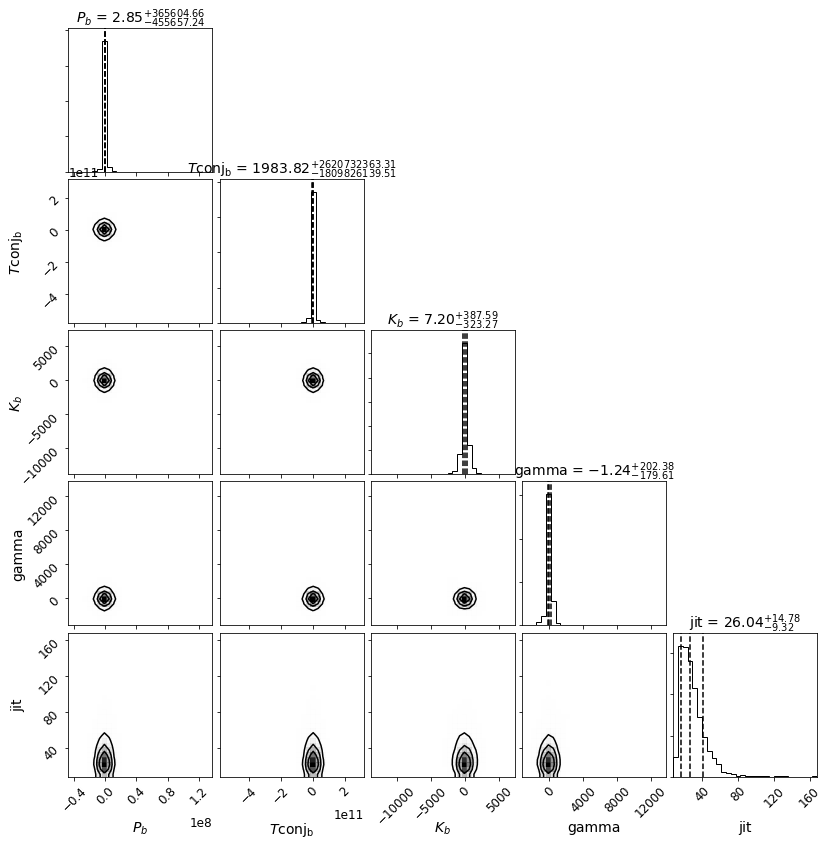

In [36]:
# TODO: make a corner plot of your MCMC results.

Corner = mcmc_plots.CornerPlot(post, df)
Corner.plot()

# Add Errors in Quadrature

Your fit should print out a value for jitter. "Jitter" is a parameter that exoplanet orbit-fitters
use to characterize the uncertainty not reflected in the observational uncertainties calculated for a 
particular dataset. These might come from stellar activity, small errors with the observing telescope, etc.

'\n\n\n\n'

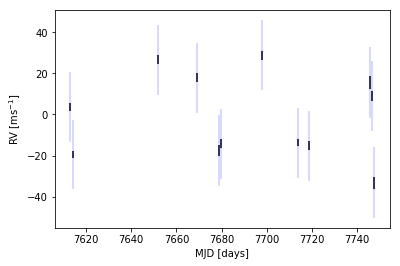

In [51]:
# TODO: Use pyplot's error bar method to make a plot of the radial velocity points in your .csv file and their
# errors. 
# (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html)

plt.errorbar(data.time, data.rv, data.rv_error, linestyle='None', color='black')
plt.xlabel('MJD [days]')
plt.ylabel('RV [ms$^{-1}$]')



# TODO: in order to more accurately represent the error on your radial velocity dataset, add the jitter value and
# each radial velocity datapoint's error value in quadrature. Bonus points if you can do this without a "for" loop!

jitter = post.likelihood.params['jit'].value

errors_inc_jitt = np.sqrt( data.rv_error**2 + jitter**2)



# TODO: redo your error bar plot using your updated individual + jitter errors. How is the plot different? 
# Is this what you expect?

plt.errorbar(data.time, data.rv, errors_inc_jitt, linestyle='None', alpha=.2, color='blue')


"""

The error bars are much bigger once we include jitter. This makes sense, as the dataset likely contains 
error sources from stellar activity, instrument imprecision, etc. that are not accounted for in the 
observational ucnertainties alone.

"""

# Incorporate Priors

For K2-55b, we have more information than just radial velocity measurements: K2-55b also transits its star, which gives us precise information about its period. 

In [ ]:
# TODO: Use section 4 of the paper about K2-55b to summarize how the authors determined the period of K2-55b. 
# Write your summary below:

"""
The authors performed a transit fit, and obtained a Gaussian-distributed posterior on the orbit of K2-55b.  

"""

We can incorporate this information into our radial velocity orbit fit as Bayesian priors on orbital period and time of transit (AKA time of conjunction, Tc). Think of it this way: we know from the transit fits that only a certain range of orbital periods are allowed, and that some orbital periods are more probable than others. We therefore add a [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) prior on orbital period to our orbit fit. This has the effect of penalizing orbit fits with orbital periods far away from the mean of the Gaussian. We do the same with Tc.

In [70]:
# TODO: modify your radvel orbit fit above to incorporate a Gaussian prior on orbital period with
# mean 2.849272 and sigma 6.9e-06 (days), and a Gaussian prior on Tc with mean 6983.4229 and 
# sigma 0.00019. Re-run your analysis.


# HINT: to add a Gaussian prior on period to a radvel.Posterior object (called ``post`` in the previous 
# radvel tutorial), use the following code:

per_mean = 2.84927265
per_sigma = 6.9e-6
tc_mean = 2456983.4229 - 2450000.
tc_sigma = 0.00019

post = radvel.posterior.Posterior(like)
post.priors += [radvel.prior.Gaussian('per1', per_mean, per_sigma)]
post.priors += [radvel.prior.Gaussian('tc1', tc_mean, tc_sigma)]
#post.priors += [radvel.prior.PositiveKPrior(1)]


# NOTE: A prior to keep K positive (commented out above) improves the fit.

print(post)
df = radvel.mcmc(post, nwalkers=50, nrun=10000)

parameter                     value      vary
per1                        2.62539       True
tc1                         2047.14       True
secosw1                           0      False
sesinw1                           0      False
k1                          16.5528       True
dvdt                              0      False
curv                              0      False
gamma                       4.73273       True
jit                         16.8732       True

Priors
------
Gaussian prior on per1, mu=2.84927265, sigma=6.9e-06
Gaussian prior on tc1, mu=6983.422900000121, sigma=0.00019

900000/4000000 (22.5%) steps complete; Running 8906.22 steps/s; Mean acceptance rate = 51.9%; Min Tz = 987.5; Max G-R = 1.030       
Discarding burn-in now that the chains are marginally well-mixed

1020000/4000000 (25.5%) steps complete; Running 15634.91 steps/s; Mean acceptance rate = 54.6%; Min Tz = 9669.1; Max G-R = 1.003       
Chains are well-mixed after 1020000 steps! MCMC completed in 1.5 min

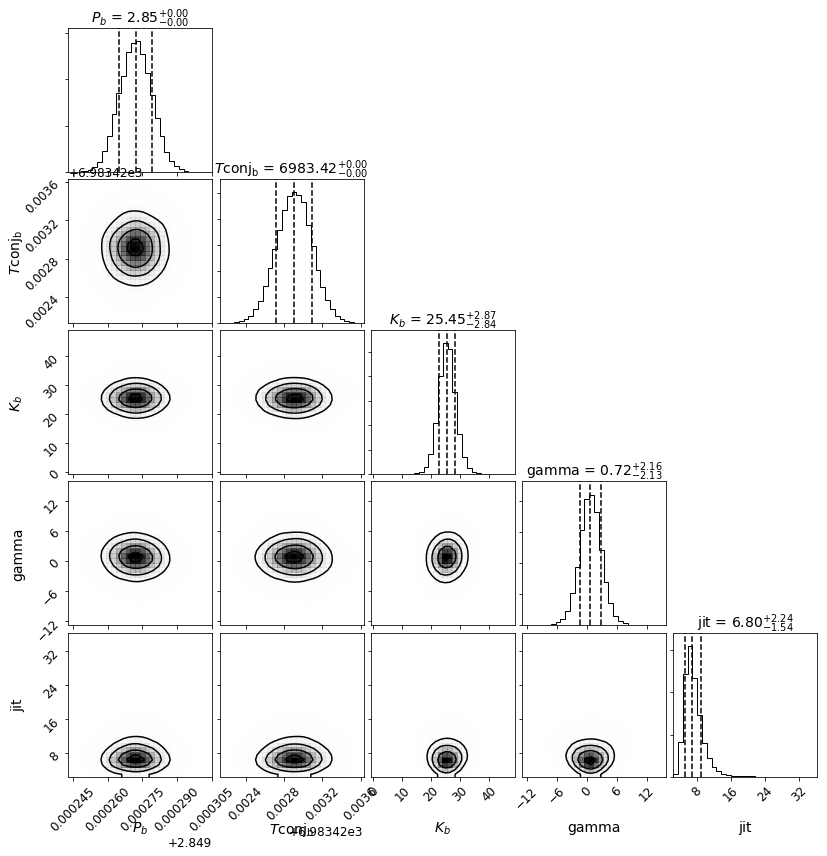

'\nWith restrictive Gaussian priors on the transit parameters, the posterior distributions are much more constrained.\nThis is because orbits with periods and/or times of conjunction far from the region of high prior probability are \nheavily disfavored, so only a subset of the full possible parameter space is explored. \n'

In [72]:
# TODO: compare the corner plots for your analyses with and without the Gaussian priors. What
# is the same? What is different? Why?

Corner = mcmc_plots.CornerPlot(post, df)
Corner.plot()

"""
With restrictive Gaussian priors on the transit parameters, the posterior distributions are much more constrained.
This is because orbits with periods and/or times of conjunction far from the region of high prior probability are 
heavily disfavored, so only a subset of the full possible parameter space is explored. Note that even though
the RV semi-amplitude (K) is not constrained by a prior, the priors on the other parameters enable the fit
to return much smaller uncertainties on K.
"""